In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_mEmerald = pd.read_csv('mEmerald_fpbase_spectra.csv')
df_mEmerald.fillna(0, inplace = True)
df_mTagBFP2 = pd.read_csv('mTagBFP2_fpbase_spectra.csv')
df_mTagBFP2.fillna(0, inplace = True)
df_mCherry = pd.read_csv('mCherry_fpbase_spectra.csv')
df_mCherry.fillna(0, inplace = True)
df_mNeptune2p5 = pd.read_csv('mNeptune2p5_fbpase_spectra.csv')
df_mNeptune2p5.fillna(0, inplace = True)

mEmerald_columns = df_mEmerald.rename(columns ={'mEmerald ex': 'excitation', 'mEmerald em': 'emission'})
mTagBFP2_columns = df_mTagBFP2.rename(columns ={'mTagBFP2 ex': 'excitation', 'mTagBFP2 em': 'emission'})
mCherry_columns = df_mCherry.rename(columns ={'mCherry ex': 'excitation', 'mCherry em': 'emission'})
mNeptune2p5_columns = df_mNeptune2p5.rename(columns ={'mNeptune2.5 ex': 'excitation', 'mNeptune2.5 em': 'emission'})

spectra_list = [mEmerald_columns, mTagBFP2_columns, mCherry_columns, mNeptune2p5_columns]
for j in range(0,4):
    excitation_column = spectra_list[j]['excitation']
    area = np.trapz(excitation_column, dx = 1)
    normalized = excitation_column/area
    excitation_column = normalized
    spectra_list[j]['excitation'] = normalized
    new_area = np.trapz(excitation_column, dx = 1)
    column = spectra_list[j]['emission']
    area_emission = np.trapz(column, dx = 1)
    normalized_em = column/area_emission
    column = normalized_em
    spectra_list[j]['emission'] = normalized_em
    new_area_em = np.trapz(column, dx = 1)

In [4]:
wavelength = 701
for index in range(401, 601):
    mEmerald_columns.loc[len(mEmerald_columns.index)] = [wavelength, 0.0, 0.0]
    wavelength = wavelength + 1

wavelength = 651
for index in range(341, 591):
    mTagBFP2_columns.loc[len(mTagBFP2_columns.index)] = [wavelength, 0.0, 0.0]
    wavelength = wavelength + 1

wavelength = 851
for index in range(621, 671):
    mNeptune2p5_columns.loc[len(mNeptune2p5_columns.index)] = [wavelength, 0.0, 0.0]
    wavelength = wavelength + 1

In [5]:
wavelength_spectrum = range(400, 900)
df_mEmerald_sliced_wavelength = mEmerald_columns.loc[mEmerald_columns['wavelength'].isin(wavelength_spectrum)]
df_mCherry_sliced_wavelength = mCherry_columns.loc[mCherry_columns['wavelength'].isin(wavelength_spectrum)]
df_mTagBFP2_sliced_wavelength = mTagBFP2_columns.loc[mTagBFP2_columns['wavelength'].isin(wavelength_spectrum)]
df_mNeptune2p5_sliced_wavelength = mNeptune2p5_columns.loc[mNeptune2p5_columns['wavelength'].isin(wavelength_spectrum)]

In [6]:
mEmerald_columns['wavelength'].isin(wavelength_spectrum)

0      False
1      False
2      False
3      False
4      False
       ...  
596     True
597     True
598     True
599     True
600    False
Name: wavelength, Length: 601, dtype: bool

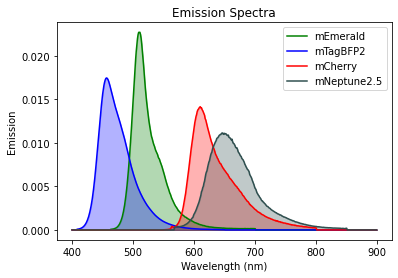

In [7]:
plt.plot(df_mEmerald_sliced_wavelength['wavelength'], df_mEmerald_sliced_wavelength['emission'], label = 'mEmerald', color = 'g')
plt.plot(df_mTagBFP2_sliced_wavelength['wavelength'], df_mTagBFP2_sliced_wavelength['emission'], label = 'mTagBFP2', color = 'blue')
plt.plot(df_mCherry_sliced_wavelength['wavelength'], df_mCherry_sliced_wavelength['emission'], label = 'mCherry', color = 'r')
plt.plot(df_mNeptune2p5_sliced_wavelength['wavelength'], df_mNeptune2p5_sliced_wavelength['emission'], label = 'mNeptune2.5', color = 'darkslategray')
plt.fill_between(df_mEmerald_sliced_wavelength['wavelength'], df_mEmerald_sliced_wavelength['emission'], color = 'green', alpha=.3)
plt.fill_between(df_mTagBFP2_sliced_wavelength['wavelength'], df_mTagBFP2_sliced_wavelength['emission'], color = 'blue', alpha=.3)
plt.fill_between(df_mCherry_sliced_wavelength['wavelength'], df_mCherry_sliced_wavelength['emission'], color = 'r', alpha=.3)
plt.fill_between(df_mNeptune2p5_sliced_wavelength['wavelength'], df_mNeptune2p5_sliced_wavelength['emission'], color = 'darkslategray', alpha=.3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Emission')
plt.title('Emission Spectra')
plt.legend()
plt.savefig('Figures/Emission Spectra.pdf')

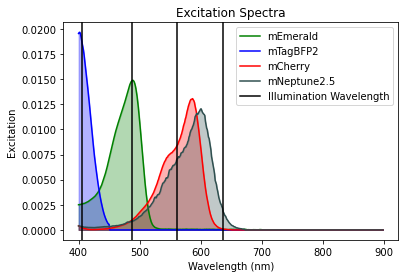

In [9]:
plt.plot(df_mEmerald_sliced_wavelength['wavelength'], df_mEmerald_sliced_wavelength['excitation'], label = 'mEmerald', color = 'g')
plt.plot(df_mTagBFP2_sliced_wavelength['wavelength'], df_mTagBFP2_sliced_wavelength['excitation'], label = 'mTagBFP2', color = 'blue')
plt.plot(df_mCherry_sliced_wavelength['wavelength'], df_mCherry_sliced_wavelength['excitation'], label = 'mCherry', color = 'r')
plt.plot(df_mNeptune2p5_sliced_wavelength['wavelength'], df_mNeptune2p5_sliced_wavelength['excitation'], label = 'mNeptune2.5', color = 'darkslategray')
plt.fill_between(df_mEmerald_sliced_wavelength['wavelength'], df_mEmerald_sliced_wavelength['excitation'], color = 'green', alpha=.3)
plt.fill_between(df_mTagBFP2_sliced_wavelength['wavelength'], df_mTagBFP2_sliced_wavelength['excitation'], color = 'blue', alpha=.3)
plt.fill_between(df_mCherry_sliced_wavelength['wavelength'], df_mCherry_sliced_wavelength['excitation'], color = 'r', alpha=.3)
plt.fill_between(df_mNeptune2p5_sliced_wavelength['wavelength'], df_mNeptune2p5_sliced_wavelength['excitation'], color = 'darkslategray', alpha=.3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Excitation')
plt.title('Excitation Spectra')
plt.axvline(x = 405, color = 'black', label = 'Illumination Wavelength')
plt.axvline(x = 488, color = 'black')
plt.axvline(x = 561, color = 'black')
plt.axvline(x = 637, color = 'black')
plt.legend()
plt.savefig('Figures/Excitation Spectra and Illumination Wavelengths.pdf', bbox_inches='tight')